In [2]:
import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np

In [3]:
# train data 
# t_data = 2*x1 -3*x2 + 2*x3

loaded_data = np.loadtxt('./TF2_Example_1.csv', delimiter=',', dtype=np.float32)

x_data = loaded_data[ : , :-1]

t_data = loaded_data[ : , [-1]]

print('loaded_data.shape = ', loaded_data.shape)
print('x_data.shape = ', x_data.shape, ', t_data.shape = ', t_data.shape)

loaded_data.shape =  (15, 4)
x_data.shape =  (15, 3) , t_data.shape =  (15, 1)


Sequential model

In [4]:
# Linear Regression 을 keras 이용하여 생성

model = Sequential()

model.add(Dense(1, input_shape=(3, ),activation='linear'))  

In [5]:
# 학습을 위한 optimizer, 손실함수 loss 정의

model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [6]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_data, t_data, epochs=1000)

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/1000
1/1 [==============================] - 0s 477ms/step - loss: 38.2840
Epoch 2/1000
1/1 [==============================] - 0s 8ms/step - loss: 29.0534
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 23.9376
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 20.8895
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 18.8960
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 17.4541
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 16.3130
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 15.3467
Epoch 9/1000
1/1 [==============================] - 0s 9ms/step - loss: 14.4909
Epoch 10/1000
1/1 [==============================] - 0s 7ms/step - loss: 13.7121
Epoch 11/1000
1/1 [==============================] - 0s 7ms/step - loss: 12.9922
Epoch 12/1000
1/1 [==============================] - 0s 7ms/step - loss: 12.3204
Epoch 13/1000
1/1 [==============

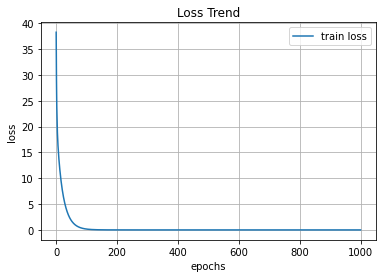

In [7]:
# 손실함수 출력

import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.legend(loc='best')

plt.show()

In [8]:
# 예측,  ret_val = 2*x1 -3*x2 + 2*x3

test_data = [ [5, 5, 0], [2, 3, 1], [-1, 0, -1], [10, 5, 2], [4, -1, -2] ]

ret_val = [ 2*data[0] -3*data[1] + 2*data[2]  for data in test_data ]

prediction_val = model.predict(np.array(test_data))

print(prediction_val)
print('==================')
print(ret_val)

[[-5.000464 ]
 [-2.9998715]
 [-3.998861 ]
 [ 8.998674 ]
 [ 7.0006976]]
[-5, -3, -4, 9, 7]


In [9]:
# 모델 입력, 출력, 가중치 확인

print(model.input)
print(model.output)
print(model.weights)

KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name='dense_input'), name='dense_input', description="created by layer 'dense_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/BiasAdd:0', description="created by layer 'dense'")
[<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.999865 ],
       [-3.00014  ],
       [ 1.9999071]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.00091101], dtype=float32)>]


Functional model

In [10]:
# Linear Regression 을 keras 이용하여 생성

in_ = Input(shape=(3,))

out_ = Dense(1, activation='linear')(in_)

model = Model(in_, out_)

In [11]:
# 학습을 위한 optimizer, 손실함수 loss 정의

model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [12]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_data, t_data, epochs=1000)

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/1000
1/1 [==============================] - 0s 240ms/step - loss: 18.8763
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 17.5634
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 16.5200
Epoch 4/1000
1/1 [==============================] - 0s 5ms/step - loss: 15.6291
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 14.8317
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 14.0980
Epoch 7/1000
1/1 [==============================] - 0s 5ms/step - loss: 13.4123
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 12.7659
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 12.1539
Epoch 10/1000
1/1 [==============================] - 0s 5ms/step - loss: 11.5729
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - loss: 11.0208
Epoch 12/1000
1/1 [==============================] - 0s 5ms/step - loss: 10.4956
Epoch 13/1000
1/1 [================

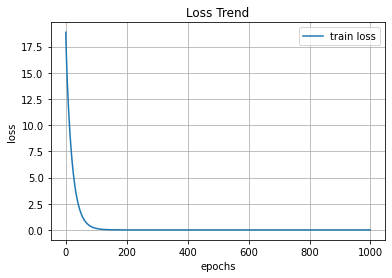

In [13]:
# 손실함수 출력

import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.legend(loc='best')

plt.show()

In [14]:
# 예측,  ret_val = 2*x1 -3*x2 + 2*x3

test_data = [ [5, 5, 0], [2, 3, 1], [-1, 0, -1], [10, 5, 2], [4, -1, -2] ]

ret_val = [ 2*data[0] -3*data[1] + 2*data[2]  for data in test_data ]

prediction_val = model.predict(np.array(test_data))

print(prediction_val)
print('==================')
print(ret_val)

[[-5.0000076]
 [-3.0000012]
 [-3.9999917]
 [ 8.999987 ]
 [ 7.0000057]]
[-5, -3, -4, 9, 7]
